In [1]:
%run constants.py

In [2]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FUNCTIONS/load_functions"

In [3]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FITS FILES/BAND6/load_band6_data.py"

In [4]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/CARTA FILES/BAND6/load_carta_data_band6.py"

# Stokes I and Polarized Intensity Plot with Vectors

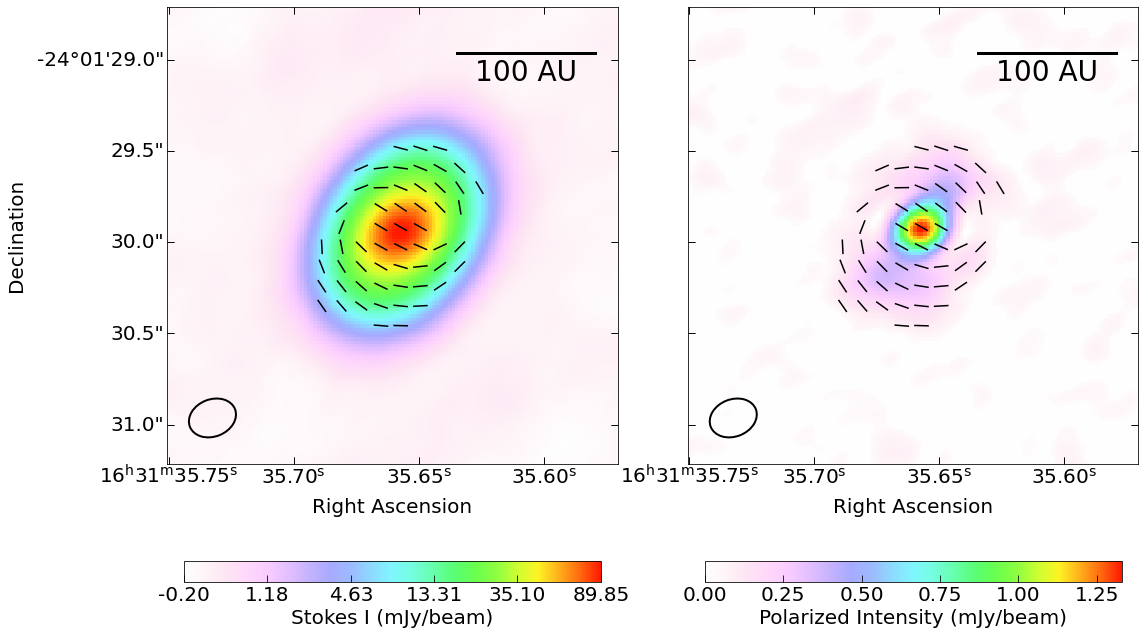

In [5]:
fig, ax = create_stokes_i_plus_one_base_plot(StokesI_wcs, StokesI_stretched_mJy, 
                                             normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                                             POLI_mJy, 'Polarized Intensity (mJy/beam)',
                                             soft_colormap_v2, 
                                             xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                                             BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                                             max_length_pix, reference_fraction)

for row in vector_data_actual_cartesian:
    ax[0].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
    
for row in vector_data_actual_cartesian:
    ax[1].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
plt.savefig(image_folder_path + "IRS63_StokesI_POLI_vectors_BAND6.pdf", 
            dpi=300, 
            bbox_inches='tight')    

# Slices Along Major and Minor Axes

In [6]:
major_data_StokesI, major_offset_arcsec_StokesI, minor_data_StokesI, minor_offset_arcsec_StokesI, slices_points = run_slices(StokesI_mJy, 
                                                                                                                             StokesI_header,
                                                                                                                             StokesI_wcs,
                                                                                                                             carta_major_data_mJy_StokesI, 
                                                                                                                             carta_minor_data_mJy_StokesI,
                                                                                                                             carta_minor_offset_StokesI,
                                                                                                                             carta_major_offset_StokesI,
                                                                                                                             band = 6,
                                                                                                                             print_statement = False)

In [7]:
major_data_POLI, major_offset_arcsec_POLI, minor_data_POLI, minor_offset_arcsec_POLI, _ = run_slices(POLI_mJy, 
                                                                                                     StokesI_header,
                                                                                                     StokesI_wcs, 
                                                                                                     carta_major_data_mJy_POLI,
                                                                                                     carta_minor_data_mJy_POLI,
                                                                                                     carta_minor_offset_POLI,
                                                                                                     carta_major_offset_POLI,
                                                                                                     band = 6,
                                                                                                     print_statement = False)

In [8]:
major_x, major_y, minor_x, minor_y = slices_points

Chi-squared comparison between user and CARTA slices:
  Minor axis values χ²: 113.118
  Major axis values χ²: 101.076
  Minor axis offset χ²: 0.009
  Major axis offset χ²: 0.009
 
Fitting the slope of the slices:
  Major Axis α:
    Mine : 1.2 (pos) and 1.2 (neg)
    CARTA: 1.1 (pos) and 1.1 (neg)
  Minor Axis α:
    Mine : 2.1 (pos) and 2.2 (neg)
    CARTA: 1.9 (pos) and 2.0 (neg)


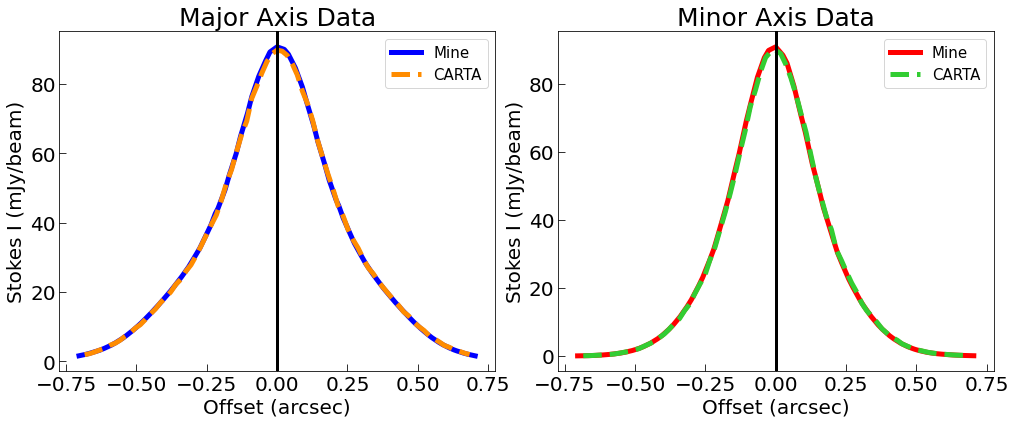

In [9]:
ax = plot_slices_along_axes(
    major_data_StokesI,
    minor_data_StokesI,
    carta_major_data_mJy_StokesI,
    carta_minor_data_mJy_StokesI,
    major_offset_arcsec_StokesI,
    minor_offset_arcsec_StokesI,
    carta_major_offset_StokesI,
    carta_minor_offset_StokesI,
    BMAJ_deg, BMIN_deg, 
    y_label="Stokes I (mJy/beam)",
    type_of_plot="Line",  # or "Scatter",
    cb_friendly = False,
    vline = True,
    fit_slices = True
)

plt.savefig(image_folder_path + "IRS63_StokesI_slice_BAND6.pdf", 
            dpi=300, 
            bbox_inches='tight')   

Chi-squared comparison between user and CARTA slices:
  Minor axis values χ²: 0.043
  Major axis values χ²: 0.027
  Minor axis offset χ²: 0.009
  Major axis offset χ²: 0.009
 
Fitting the slope of the slices:
  Major Axis α:
    Mine : 2.8 (pos) and 1.8 (neg)
    CARTA: 1.6 (pos) and 1.8 (neg)
  Minor Axis α:
    Mine : 3.0 (pos) and 2.9 (neg)
    CARTA: 2.7 (pos) and 2.3 (neg)


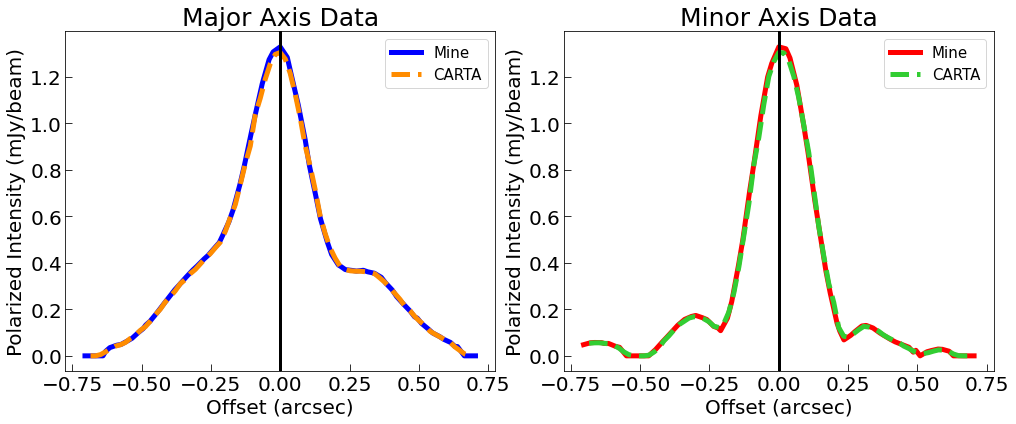

In [10]:
ax = plot_slices_along_axes(
    major_data_POLI,
    minor_data_POLI,
    carta_major_data_mJy_POLI,
    carta_minor_data_mJy_POLI,
    major_offset_arcsec_POLI,
    minor_offset_arcsec_POLI,
    carta_major_offset_POLI,
    carta_minor_offset_POLI,
    BMAJ_deg, BMIN_deg, 
    y_label="Polarized Intensity (mJy/beam)",
    type_of_plot="Line",  # "Line" or "Scatter",
    cb_friendly = False,
    vline = True,
    fit_slices = True
)


plt.savefig(image_folder_path + "IRS63_POLI_slice_BAND6.pdf", 
            dpi=300, 
            bbox_inches='tight')   

In [11]:
data_dict = {
    "StokesI_major"         : major_data_StokesI,
    "StokesI_offset_major": major_offset_arcsec_StokesI,
    "StokesI_minor"         : minor_data_StokesI,
    "StokesI_offset_minor": minor_offset_arcsec_StokesI
}

# Convert to DataFrame
df = pd.DataFrame(data_dict)

# Save to CSV
df.to_csv(band6_carta_folder_path + "IRS63_my_slice_StokesI_BAND6.csv", index=False)

In [12]:
data_dict = {
    "POLI_major"         : major_data_POLI,
    "POLI_offset_major": major_offset_arcsec_POLI,
    "POLI_minor"         : minor_data_POLI,
    "POLI_offset_minor": minor_offset_arcsec_POLI
}

# Convert to DataFrame
df = pd.DataFrame(data_dict)

# Save to CSV
df.to_csv(band6_carta_folder_path + "IRS63_my_slice_POLI_BAND6.csv", index=False)

# Fitting the slices


$I(r) \propto r^\alpha$

Take log of both sides:
$\log_{10}(I(r))=\alpha \log_{10}(r)+C$

We need to comvert the data from mJy/beam to mJy/arcsec$^2$ (or radians will also work).

We can calculate the beam area with the equation:
$1.113 \cdot BMAJ \cdot BMIN$,
where $BMAJ$ and $BMIN$

# Ratio Models

In [13]:
vector_data_plotting_grid, vector_data_list_100U_to_100A, testing_vector_angles = ratio_model_band6(StokesQ_grid_100Uniform, StokesU_grid_100Uniform,
                                                                                           StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal,
                                                                                           ny, nx,
                                                                                           vector_length_pix_const,
                                                                                           StokesI_mJy, StokesI_err_mJy,
                                                                                           POLI_mJy, POLI_err_mJy, 
                                                                                           PA_err_deg,
                                                                                           # step = 10,
                                                                                           )

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


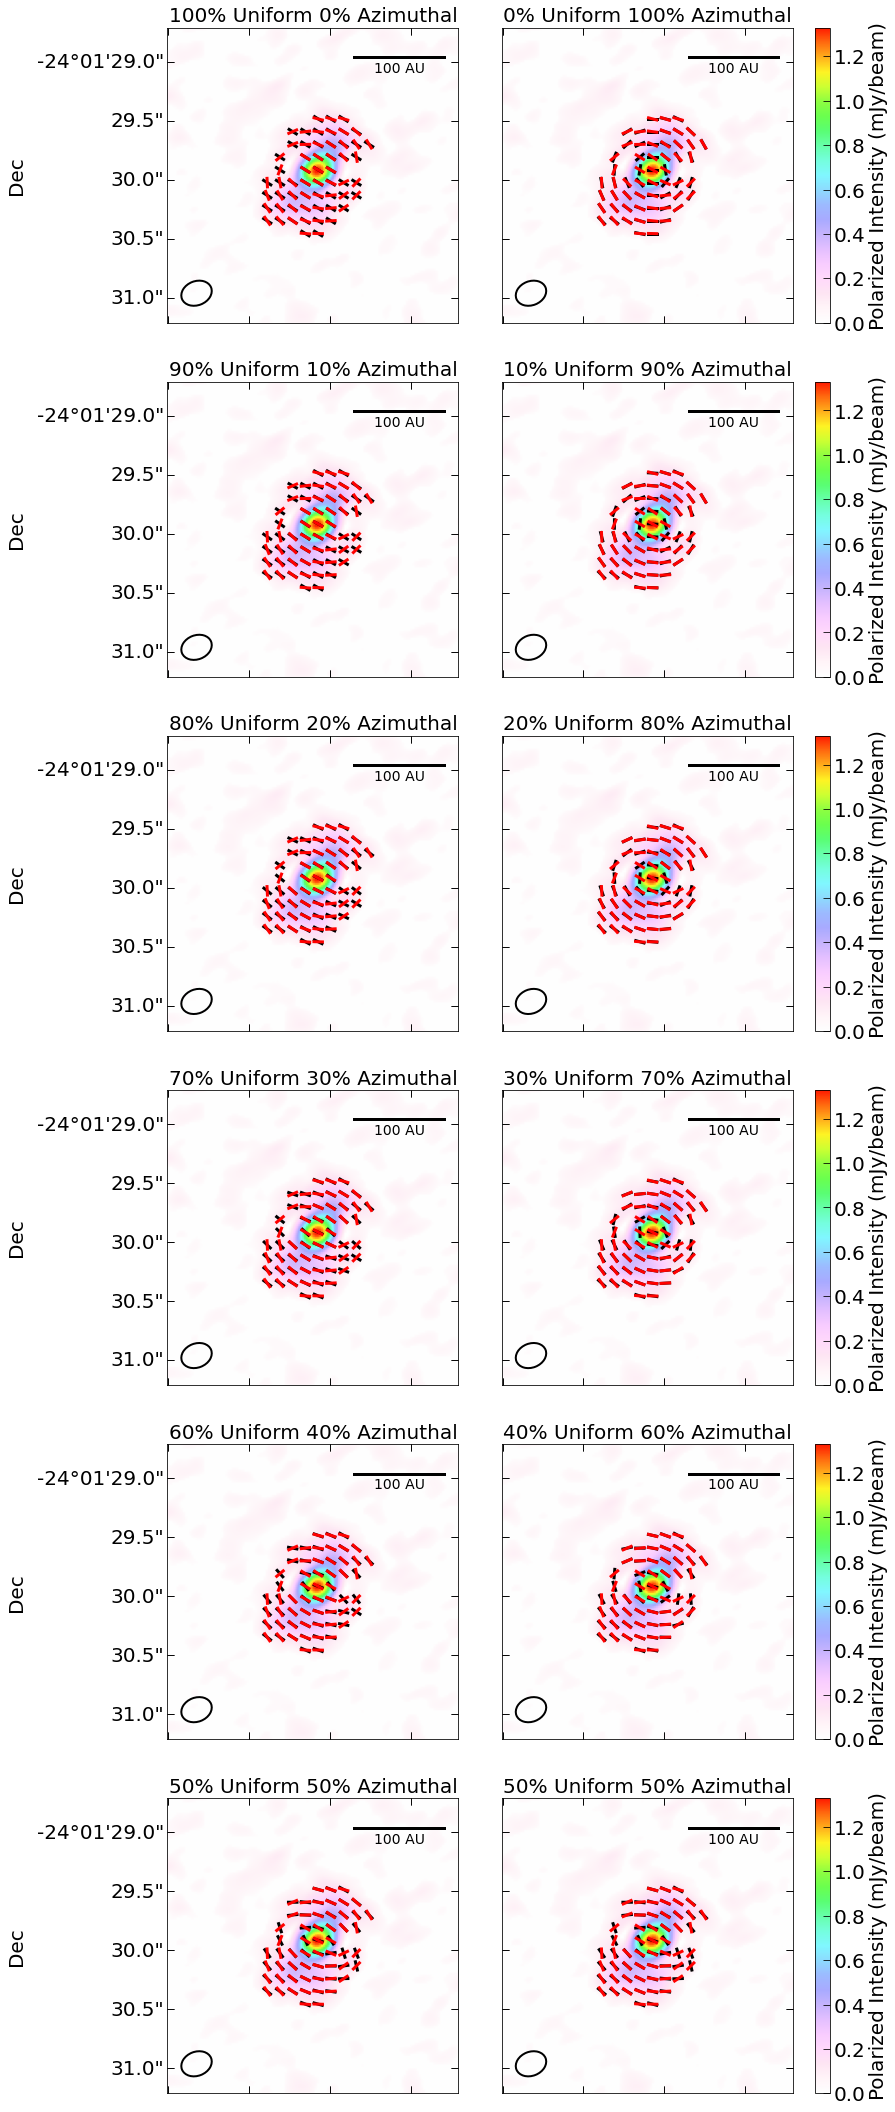

In [14]:
ax = plot_ratio_grid(POLI_mJy,
                    StokesI_wcs, soft_colormap_v2, 
                    xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                    BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                    max_length_pix, reference_fraction,
                    vector_data_actual_cartesian, vector_data_plotting_grid)

## Find the best one

In [15]:
min_index = find_best_fit_ratio_model(vector_angle_actual_sky, testing_vector_angles)

the length of chi_squared_values is : 11
Chi-squared values for ratio models:
  100 U 0 A: χ² = 21.610
  90 U 10 A: χ² = 20.493
  80 U 20 A: χ² = 19.445
  70 U 30 A: χ² = 18.675
  60 U 40 A: χ² = 18.881
  50 U 50 A: χ² = 25.643
  40 U 60 A: χ² = 20.258
  30 U 70 A: χ² = 15.836
  20 U 80 A: χ² = 15.510
  10 U 90 A: χ² = 13.120
  0 U 100 A: χ² = 13.455

Best-fit ratio model: 10 U 90 A (χ² = 13.120)


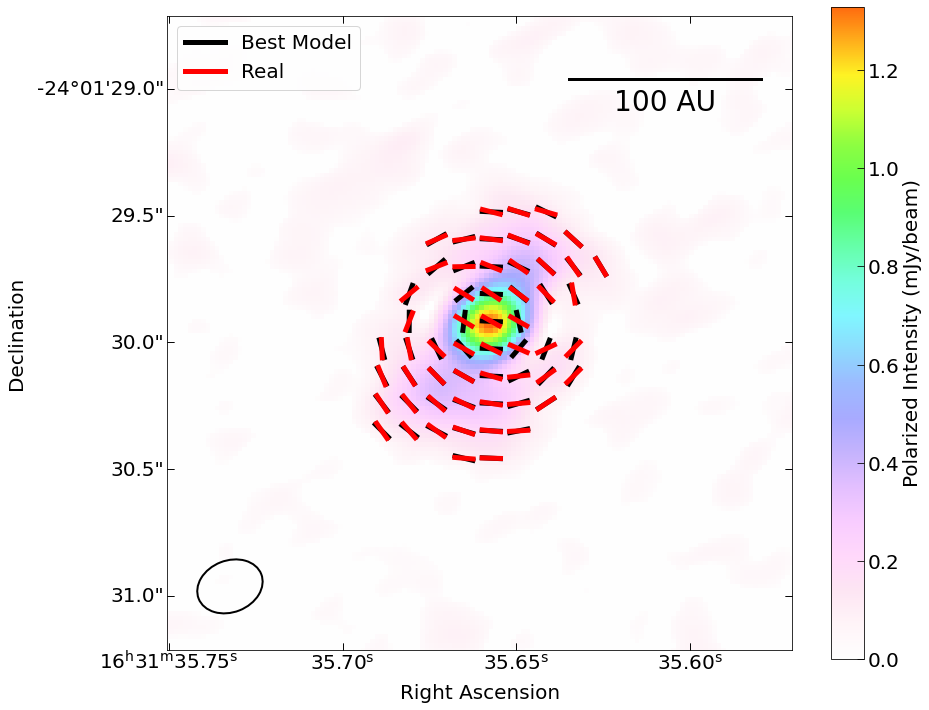

In [16]:
fig, ax = create_base_plot(StokesI_wcs, POLI_mJy, 'Polarized Intensity (mJy/beam)' , 
                           soft_colormap_no_red, 
                           xmin, xmax , ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

# Add vector plots (Best Model: black)
for i, row in enumerate(vector_data_list_100U_to_100A[min_index]):
    if i == 0:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, label='Best Model')
    else:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5)

# Plot actual vector data (Real: red)
for i, row in enumerate(vector_data_actual_cartesian):
    if i == 0:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, label='Real')
    else:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5)

# Show legend
ax.legend(fontsize=legend_title_fs, loc = 'best')


plt.savefig(image_folder_path + "IRS63_best_ratio_BAND6.pdf", 
            dpi=300, 
            bbox_inches='tight')   

# Gaussian Model 

In [17]:
phi_values = [2, 3, 4, 5, 6, 7]


BMAJ_values_pix =  np.array([10, 20, 30, 40, 50]) # + np.array(BMAJ_pix, dtype=int)
BMIN_values_pix =  np.array([10, 20, 30, 40, 50]) # + np.array(BMIN_pix, dtype=int)

# Print results
print(f'The BMAJ pix values we will test are: {BMAJ_values_pix}')
print(f'The BMIN pix values we will test are: {BMIN_values_pix}')

The BMAJ pix values we will test are: [10 20 30 40 50]
The BMIN pix values we will test are: [10 20 30 40 50]


In [ ]:
gaussian_values, gaussian_results, vector_data_gaussian_best = run_gaussian_model_band6(major_angle_rad_cartesian_band6, phi_values, 
                                                                                        BMAJ_values_pix, BMIN_values_pix, 
                                                                                        RA_centre_pix, Dec_centre_pix, 
                                                                                        StokesQ_grid_100Uniform, StokesU_grid_100Uniform,
                                                                                        StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal,
                                                                                        vector_angle_actual_sky,
                                                                                        ny, nx, 
                                                                                        StokesI_mJy, StokesI_err_mJy,
                                                                                        POLI_mJy, POLI_err_mJy, 
                                                                                        PA_err_deg,
                                                                                        print_statements = True)

In [ ]:
fig, ax = create_base_plot(StokesI_wcs, 
                           POLI_mJy, 'Polarized Intensity (mJy/beam)', 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

first_real = True
for row in vector_data_actual_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    
    
# Add vector plots, ensuring the label appears only once
first_best_model = True
for row in vector_data_gaussian_best:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, 
            label='Best Gaussian Model' if first_best_model else None)
    first_best_model = False

ax.legend(fontsize = legend_text_fs)


plt.savefig(image_folder_path + "IRS63_best_gaussian_BAND6.pdf", 
            dpi=300, 
            bbox_inches='tight')   

In [ ]:
analyze_gaussian_averages_vs_chi2(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix)

In [ ]:
plot_2d_contours_for_gaussian(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix, 'phi', soft_colormap_v2)

In [ ]:
plot_2d_contours_for_gaussian(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix, 'BMIN', soft_colormap_v2)

In [ ]:
plot_2d_contours_for_gaussian(gaussian_values, phi_values, BMAJ_values_pix, BMIN_values_pix, 'BMAJ', soft_colormap_v2)

##### 